In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Exploration of the dataset

## List columns names

In [2]:
df = pd.read_csv(
        "en.openfoodfacts.org.products.csv",
        sep="\t",
        nrows=5,
    )
list(df.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'last_modified_by',
 'last_updated_t',
 'last_updated_datetime',
 'product_name',
 'abbreviated_product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'packaging_en',
 'packaging_text',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'origins_en',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'ingredients_tags',
 'ingredients_analysis_tags',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'serving_quantity',
 'no_nutrition_data',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'nutriscore_score

## Product identification and basic information
- Product name
- Brand under which the product is marketed
- Categories EN: product category (beverage, snack, protein, supplement, ...)
- Countries EN: where the product is sold
- Quantity (1pcs, 100g, 1kg, ...)

In [3]:
COLS = [
    "product_name",  # name of the product
    "brands",        # brand(s) under which the product is marketed
    "categories_en", # product category (e.g., beverages, snacks, dairy)
    "countries_en",  # country or countries where the product is sold
    "quantity",      # quantity of the product (e.g., 500g, 1L)
]
NROWS = 20 # change for more/less products

df = pd.read_csv(
        "en.openfoodfacts.org.products.csv",
        sep="\t",
        nrows=NROWS,
        usecols=COLS,
    ).fillna('') # replace NaN with empty string
df

,product_name,quantity,brands,categories_en,countries_en
0,Filet,1pcs,Body Lab,"Dietary supplements,Bodybuilding supplements,P...","Germany,United States"
1,Poudre de grillon,100 g,naak,"Beverages and beverages preparations,Beverage ...",Canada
2,Feuchtes Toilettentuch - Kamille,70pcs,3 alfa,,Greece
3,Almond Dark Chocolate,100g,Alter Aco,"Snacks,Sweet snacks,Cocoa and its products,Cho...",Czech Republic
4,Bio inulin,550g,EWL,"Plant-based foods and beverages,Plant-based fo...",France
5,Mac and cheese,,Chef boy r dee,"Beverages and beverages preparations,Plant-bas...","India,Senegal"
6,,,,,Spain
7,After burn,10 kg,Afterburn,"Dietary supplements,Bodybuilding supplements,P...",United States
8,Flohsamenschalen,1 kg,Vita2You,,Spain
9,Protein Plant Powered Wrap,1pcs,Mission,"Sandwiches,Wraps,Protein","Germany,World"


## Nutritional information
**For any health-related or nutritional comparison analysis**

NB: we already see a problem: some products have 0 information, there is even some fully empty rows. This means there is some more cleanup to do.

In [4]:
COLS = [
    "product_name",
    "energy-kcal_100g",
    "fat_100g",
    "saturated-fat_100g",
    "carbohydrates_100g",
    "sugars_100g",
    "fiber_100g",
    "proteins_100g",
    "salt_100g",
    "sodium_100g",
    "nova_group",         # classification of the level of food processing (e.g., minimally processed, highly processed) -> https://en.wikipedia.org/wiki/Nova_classification
    "nutriscore_score",   # nutritional quality score based on the Nutri-Score system
    "nutriscore_grade",   # Nutri-Score letter grade (A to E) indicating nutritional quality
]
NROWS = 20 # change for more/less products

df = pd.read_csv(
        "en.openfoodfacts.org.products.csv",
        sep="\t",
        nrows=NROWS,
        usecols=COLS,
    )
df = df.fillna('') # replace NaN with empty string
df = df.replace("unknown", "") # replace 'unknown' with empty string
df

,product_name,nutriscore_score,nutriscore_grade,nova_group,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,Filet,12.0,d,4.0,406.0,6.6,4.3,6.7,6.7,,80.0,0.5,0.2
1,Poudre de grillon,,,,400.0,16.444445,4.666666,44.666668,4.888889,17.111111,10.0,0.013123,0.005249
2,Feuchtes Toilettentuch - Kamille,,,,160.0,3.2,0.5,19.8,1.4,8.5,8.7,0.807087,0.322835
3,Almond Dark Chocolate,19.0,e,3.0,578.0,40.9,21.5,40.7,35.0,8.4,7.5,0.0,0.0
4,Bio inulin,-2.0,a,3.0,208.0,0.0,0.0,8.0,8.0,88.0,0.0,0.23,0.092
5,Mac and cheese,17.0,e,4.0,85.0,2.4,1.1,9.6,2.2,1.3,5.7,1.181102,0.472441
6,,,,,,,,,,,,,
7,After burn,15.0,d,,536.0715,35.714284,8.928572,46.42857,28.57143,10.714286,10.714286,0.089286,0.035714
8,Flohsamenschalen,,,,16.0,0.5,0.06,2.0,0.24,88.0,1.0,0.3,0.12
9,Protein Plant Powered Wrap,,,,,,,,,,,,


## Additives and Ingredients
**Analyzing food safety, additives, and potential allergens**

NB: in `ingredients_text` column, some ingredients are written in french, others in english

In [5]:
COLS = [
    "product_name",
    "additives_tags",   # additives present in the product (tag format, e.g.: e330, e296)
    "ingredients_text", # text description of the ingredients (FR and EN)
    "allergens",
    "allergens_en",
]
NROWS = 20 # change for more/less products

df = pd.read_csv(
        "en.openfoodfacts.org.products.csv",
        sep="\t",
        nrows=NROWS,
        usecols=COLS,
    )
df = df.fillna('') # replace NaN with empty string
df

,product_name,ingredients_text,allergens,allergens_en,additives_tags
0,Filet,"beta alanine, creatine hcl, ancient peat & app...",,,"en:e296,en:e330,en:e552,en:e950,en:e955"
1,Poudre de grillon,,,,
2,Feuchtes Toilettentuch - Kamille,,,,
3,Almond Dark Chocolate,"Organic cocoa mass 60%, organic cane sugar, or...",,,
4,Bio inulin,"Jus et purée d'abricots (50%), eau, sucre.",,,
5,Mac and cheese,"Purified Water, Acidity Regulator (Citric Acid...",,,"en:e202,en:e211,en:e330,en:e955"
6,,HONIG stillende Frauen nicht geeignet. D bestr...,,,
7,After burn,,,,
8,Flohsamenschalen,,,,
9,Protein Plant Powered Wrap,,,,


## Sustainability and Environmental Impact

**Sustainability-focused analysis**

In [6]:
COLS = [
    "product_name",
    "ecoscore_score",        # product’s Ecoscore, measuring its environmental impact
    "ecoscore_grade",        # Ecoscore letter grade (A to E)
    "packaging_tags",        # information about the packaging material
    "carbon-footprint_100g", # estimated carbon footprint for 100g of the product
]
NROWS = 20 # change for more/less products

df = pd.read_csv(
        "en.openfoodfacts.org.products.csv",
        sep="\t",
        nrows=NROWS,
        usecols=COLS,
    )
df = df.fillna('') # replace NaN with empty string
df = df.replace("unknown", "") # replace 'unknown' with empty string
df

,product_name,packaging_tags,ecoscore_score,ecoscore_grade,carbon-footprint_100g
0,Filet,,,,
1,Poudre de grillon,,,,
2,Feuchtes Toilettentuch - Kamille,,,,
3,Almond Dark Chocolate,,40.0,c,
4,Bio inulin,en:glass,,,
5,Mac and cheese,"en:paper-or-cardboard,en:bottle-or-vial,en:car...",50.0,c,
6,,,,,
7,After burn,,,,
8,Flohsamenschalen,,,,
9,Protein Plant Powered Wrap,,,,


## Food Groups

**For grouping foods into common categories, which helps with overall trends analysis**

In [7]:
COLS = [
    "product_name",
    "pnns_groups_1",
    "pnns_groups_2",
]
NROWS = 20 # change for more/less products

df = pd.read_csv(
        "en.openfoodfacts.org.products.csv",
        sep="\t",
        nrows=NROWS,
        usecols=COLS,
    )
df = df.fillna('') # replace NaN with empty string
df = df.replace("unknown", "") # replace 'unknown' with empty string

df

,product_name,pnns_groups_1,pnns_groups_2
0,Filet,,
1,Poudre de grillon,,
2,Feuchtes Toilettentuch - Kamille,,
3,Almond Dark Chocolate,Sugary snacks,Chocolate products
4,Bio inulin,Fruits and vegetables,Vegetables
5,Mac and cheese,Beverages,Artificially sweetened beverages
6,,,
7,After burn,,
8,Flohsamenschalen,,
9,Protein Plant Powered Wrap,Composite foods,Sandwiches


In [8]:
# /!\ CAREFUL - heavy command going through the entire dataset, took ~2min on my computer

ARE_YOU_SURE = False

if ARE_YOU_SURE:
    df_pnns = pd.read_csv(
            "en.openfoodfacts.org.products.csv",
            sep="\t",
            usecols=["product_name", "pnns_groups_1", "pnns_groups_2"],
        )
else:
    print("You are not sure, are you ?")

In [9]:
# Remove 'unknown' and NaN values
df_pnns_clean = df_pnns[df_pnns['pnns_groups_1'].notnull() & (df_pnns['pnns_groups_1'] != 'unknown')]
df_pnns_clean

,product_name,pnns_groups_1,pnns_groups_2
3,Almond Dark Chocolate,Sugary snacks,Chocolate products
4,Bio inulin,Fruits and vegetables,Vegetables
5,Mac and cheese,Beverages,Artificially sweetened beverages
9,Protein Plant Powered Wrap,Composite foods,Sandwiches
10,Madeleines nature,Sugary snacks,Biscuits and cakes
...,...,...,...
3478314,Erdbeerkuchen 1019g tiefgefroren,Sugary snacks,Biscuits and cakes
3478315,Steak haché 5%,Fish Meat Eggs,Meat
3478318,Marrons glacés,Sugary snacks,Sweets
3478321,Beurre de cacahuète bio,Cereals and potatoes,Legumes


### How many products fall into each `pnns_groups_1` category?

In [10]:
# Grouping and counting the number of products in each group
product_count_by_group = df_pnns_clean['pnns_groups_1'].value_counts()

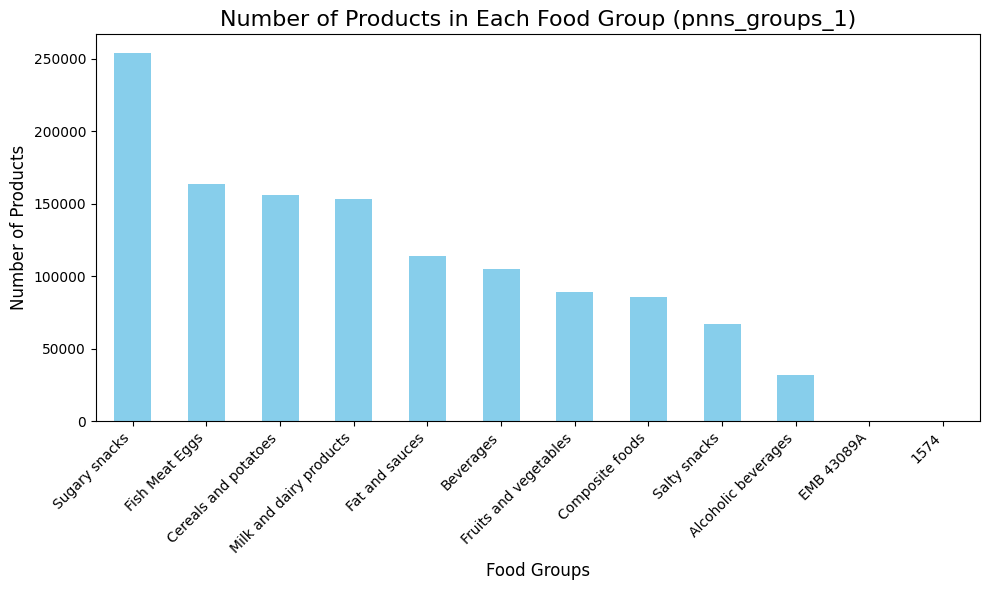

In [11]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
product_count_by_group.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.title('Number of Products in Each Food Group (pnns_groups_1)', fontsize=16)
plt.xlabel('Food Groups', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

### What is the average nutritional value (e.g., calories, sugar, fat) of products in each `pnns_groups_1` category?

In [12]:
avg_nutritional_values = pd.read_csv(
    "en.openfoodfacts.org.products.csv",
    sep="\t",
    nrows=1000,
).groupby('pnns_groups_1').agg({
    'energy-kcal_100g': 'mean',
    'sugars_100g': 'mean',
    'fat_100g': 'mean',
    'proteins_100g': 'mean',
    'salt_100g': 'mean'
}).reset_index()

In [13]:
avg_nutritional_values

,pnns_groups_1,energy-kcal_100g,sugars_100g,fat_100g,proteins_100g,salt_100g
0,Alcoholic beverages,45.000000,1.000000,3.600000,60.000000,0.860000
1,Beverages,41.666667,6.340000,4.900000,12.128333,0.323784
2,Cereals and potatoes,363.034000,7.609167,14.443846,20.106154,0.482270
3,Composite foods,194.414286,5.785667,5.790000,15.734286,0.571300
4,Fat and sauces,402.440002,9.760000,21.450000,21.850000,3.160000
5,Fish Meat Eggs,367.500000,1.816667,28.966667,15.683333,2.760000
6,Fruits and vegetables,240.800000,17.941429,4.492857,5.967143,0.292500
7,Milk and dairy products,86.666667,9.333333,1.666667,7.333333,NaN
8,Salty snacks,263.500000,19.466667,31.500000,12.161905,0.020000
9,Sugary snacks,430.722222,36.521340,21.115385,6.911538,0.397931


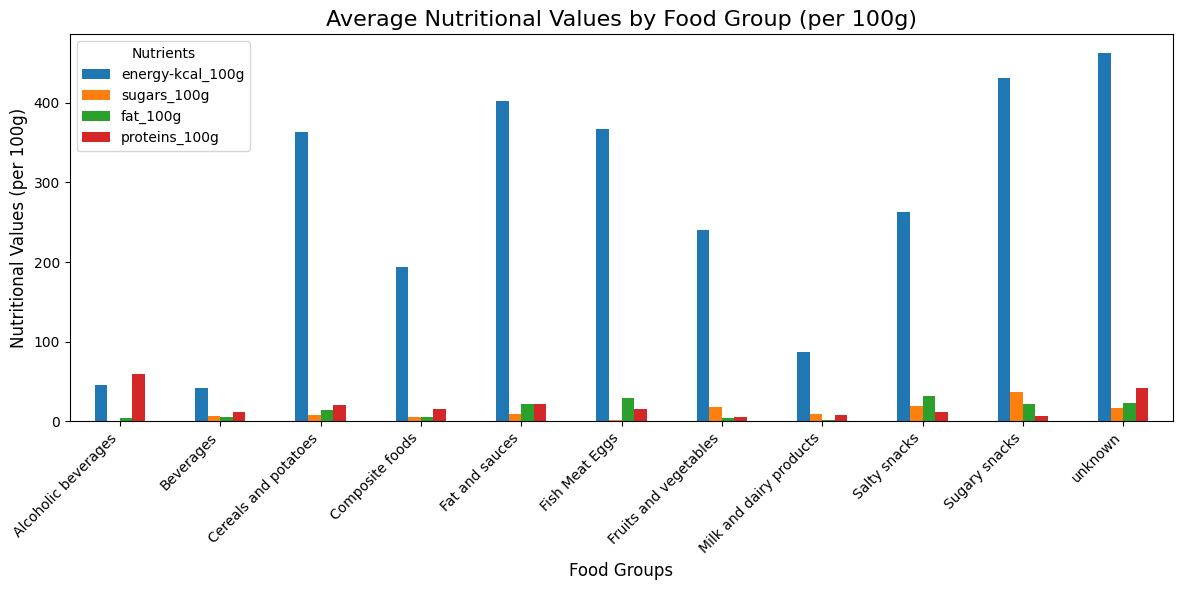

In [14]:
# Setting up the plot
nutrients = ['energy-kcal_100g', 'sugars_100g', 'fat_100g', 'proteins_100g']


# Grouped bar plot
avg_nutritional_values.set_index('pnns_groups_1')[nutrients].plot(kind='bar', figsize=(12, 6))

# Adding labels and title
plt.title('Average Nutritional Values by Food Group (per 100g)', fontsize=16)
plt.xlabel('Food Groups', fontsize=12)
plt.ylabel('Nutritional Values (per 100g)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Nutrients", fontsize=10)
plt.tight_layout()

# Display the plot
plt.show()

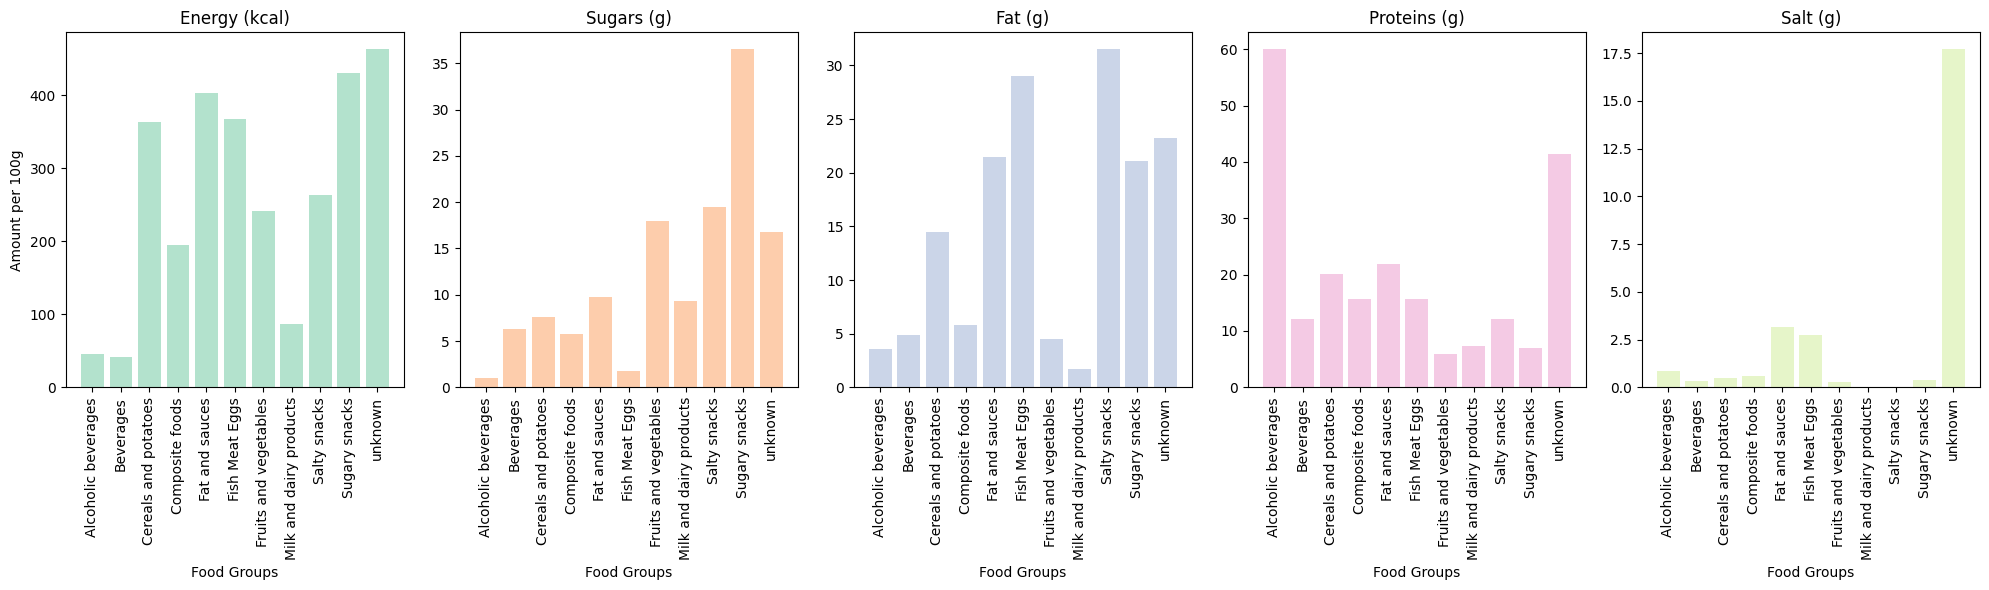

In [15]:
# Set the figure size for subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=False)

# Define the columns and titles and colors
columns = ['energy-kcal_100g', 'sugars_100g', 'fat_100g', 'proteins_100g', 'salt_100g']
titles = ['Energy (kcal)', 'Sugars (g)', 'Fat (g)', 'Proteins (g)', 'Salt (g)']
color = plt.get_cmap('Pastel2')

# Create a bar plot for each nutrient
for i, column in enumerate(columns):
    axes[i].bar(avg_nutritional_values['pnns_groups_1'], avg_nutritional_values[column], color=color(i))
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Food Groups')
    axes[i].tick_params(axis='x', rotation=90)

# Add a shared ylabel for the first plot
axes[0].set_ylabel('Amount per 100g')

# Adjust the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()